In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import pandas as pd
from sklearn import preprocessing
import numpy as np

df = pd.read_csv("../augmented_data/augmented_data__C04__01__F04.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print(df.shape)

cont_cols = ['edad','peso','frecuencia_cardiaca','presion_arterial_sistolica','presion_arterial_diastolica','hb','creatinina','ckmb','trigliceridos','glicemia','colesterol','escala_grace','tiempo_isquemia']
bin_cols = ['estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel','dialisis','scacest','insuficiencia_cardiaca_congestiva','enfermedad_arterias_coronarias','infarto_miocardio_agudo']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols

df_normalized = pd.concat([df_normalized, df[bin_cols]], axis=1)

df_normalized= df_normalized.dropna()
print(df_normalized.shape)

X_train = df_normalized.drop('estado_vital', axis=1)
y_train = df_normalized['estado_vital']

# Leer el archivo de Ejecución
df2 = pd.read_excel('../Mortalidad FINAL.xlsx',sheet_name='Ejecucion')
df2=df[['edad','peso','frecuencia_cardiaca','presion_arterial_sistolica','presion_arterial_diastolica','hb','creatinina','ckmb','trigliceridos','glicemia','colesterol','escala_grace','tiempo_isquemia','estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel','dialisis','scacest','insuficiencia_cardiaca_congestiva','enfermedad_arterias_coronarias','infarto_miocardio_agudo']]


df_scaled = min_max_scaler.fit_transform(df2[cont_cols])
df_normalized2 = pd.DataFrame(df_scaled)
df_normalized2.columns = cont_cols

df_normalized2 = pd.concat([df_normalized2, df2[bin_cols]], axis=1)

df_normalized2= df_normalized2.dropna()
df_normalized2 = df2.sample(n=len(df_normalized), random_state=1)
df_normalized2 = df_normalized2.reindex(columns=df_normalized.columns)
X_test=df_normalized2.drop('estado_vital', axis=1)
y_test = df_normalized2['estado_vital']


def evaluate(C, X_test, y_test):
    
    print(X_test.shape)
    print(y_test.shape)
    y_pred = C.predict(X_test)
    
    k_fold = StratifiedKFold(2, shuffle = True, random_state=1) #10-fold cross-validation
    cv_scores = cross_val_score(C, X_test, y_test.values.ravel(), cv = k_fold)

    print("Cross-validation score means: ", cv_scores.mean())
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

(1600, 29)
(1600, 29)


In [93]:
def ploting(model_his):
    import matplotlib.pyplot as plt
    # summarize history for accuracy
    plt.plot(model_his.history['accuracy'])
    plt.plot(model_his.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    # summarize history for loss
    plt.plot(model_his.history['loss'])
    plt.plot(model_his.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [94]:
def print_graphics(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_test, y_test)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    
    # Mostrar la gráfica
    plt.show()

/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/

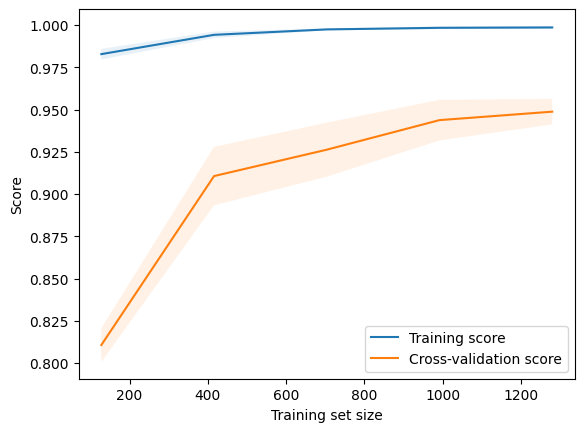

(1600, 28)
(1600,)
Cross-validation score means:  0.930625
Accuracy:  0.63375
              precision    recall  f1-score   support

         0.0       0.58      0.94      0.72       800
         1.0       0.85      0.33      0.47       800

    accuracy                           0.63      1600
   macro avg       0.71      0.63      0.60      1600
weighted avg       0.71      0.63      0.60      1600



/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


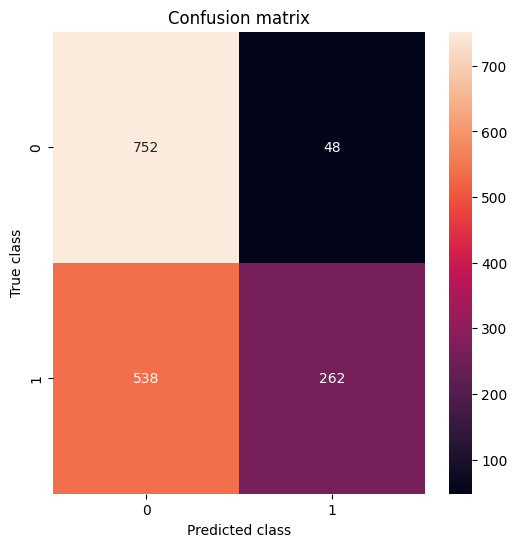

In [95]:
from sklearn import svm
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# #training KNN
# C = KNeighborsClassifier(n_neighbors = 15)
# C.fit(X_train, y_train) #train classifier
# create a svm classifier

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

# clf = svm.SVC(kernel='sigmoid',random_state=10,class_weight='balanced') # rbf kernel
# # train the model using the training sets
# clf.fit(X_train_res, y_train_res)
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train_res, y_train_res)
pred_y = bbc.predict(X_test)

# pred_y = clf.predict(X_test)

print_graphics(bbc)

evaluate(bbc, X_test, y_test)

(1600, 28)
(1600,)
Cross-validation score means:  0.818125
Accuracy:  0.53625
              precision    recall  f1-score   support

         0.0       0.65      0.16      0.25       800
         1.0       0.52      0.92      0.66       800

    accuracy                           0.54      1600
   macro avg       0.59      0.54      0.46      1600
weighted avg       0.59      0.54      0.46      1600



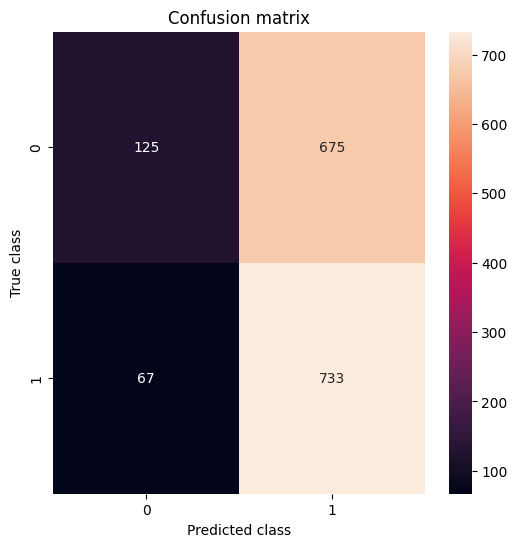

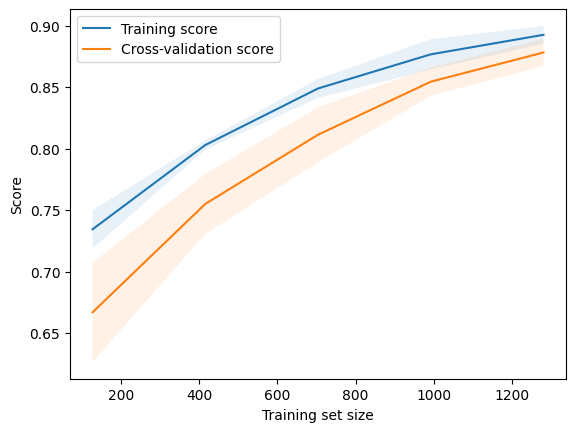

In [96]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

#training KNN
C = KNeighborsClassifier(n_neighbors = 15)
C.fit(X_train_res, y_train_res) #train classifier

evaluate(C, X_test, y_test)
print_graphics(C)

(1600, 28)
(1600,)
Cross-validation score means:  0.81125
Accuracy:  0.546875
              precision    recall  f1-score   support

         0.0       0.73      0.15      0.25       800
         1.0       0.53      0.95      0.68       800

    accuracy                           0.55      1600
   macro avg       0.63      0.55      0.46      1600
weighted avg       0.63      0.55      0.46      1600



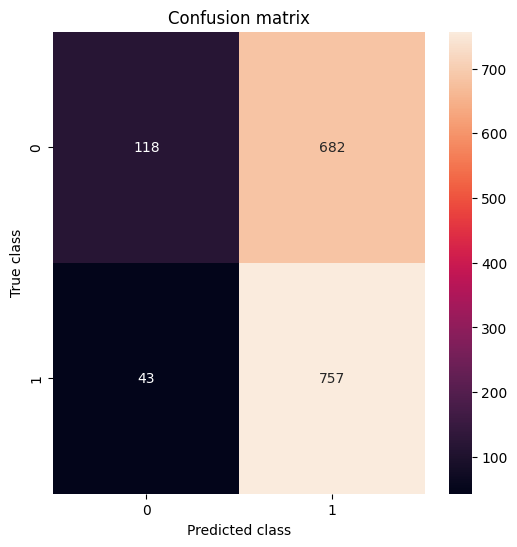

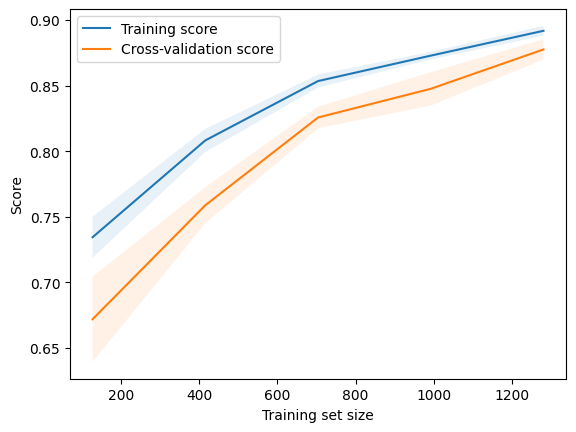

In [97]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc1 = BalancedBaggingClassifier(estimator=C,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc1.fit(X_train, y_train)
evaluate(bbc1,X_test,y_test)
print_graphics(bbc1)

/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/

(1600, 28)
(1600,)


/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/

Cross-validation score means:  0.9275
Accuracy:  0.678125
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.70       800
         1.0       0.70      0.62      0.66       800

    accuracy                           0.68      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.68      0.68      1600



/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


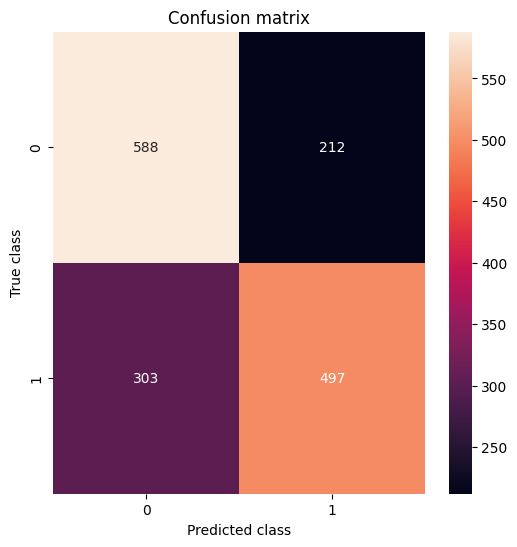

/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/opt/

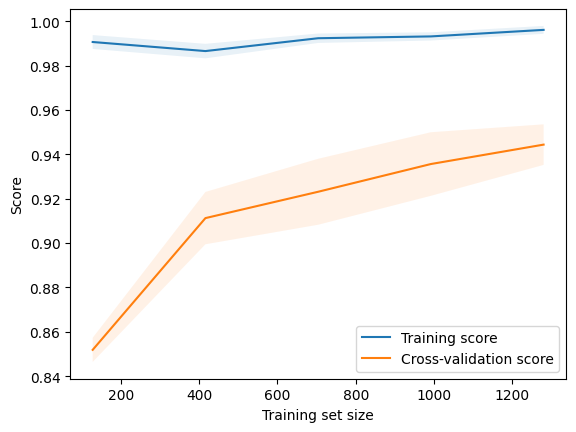

In [98]:
bbc2 = BalancedBaggingClassifier(estimator=bbc,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc2.fit(X_train_res, y_train_res)
evaluate(bbc2,X_test,y_test)
print_graphics(bbc2)

(1600, 28)
(1600,)
Cross-validation score means:  0.844375
Accuracy:  0.581875
              precision    recall  f1-score   support

         0.0       0.55      0.93      0.69       800
         1.0       0.76      0.24      0.36       800

    accuracy                           0.58      1600
   macro avg       0.66      0.58      0.53      1600
weighted avg       0.66      0.58      0.53      1600



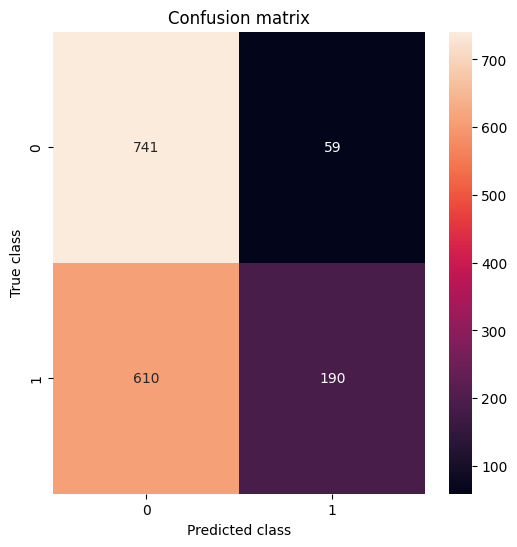

(1600, 28)
(1600,)
Cross-validation score means:  0.844375
Accuracy:  0.581875
              precision    recall  f1-score   support

         0.0       0.55      0.93      0.69       800
         1.0       0.76      0.24      0.36       800

    accuracy                           0.58      1600
   macro avg       0.66      0.58      0.53      1600
weighted avg       0.66      0.58      0.53      1600



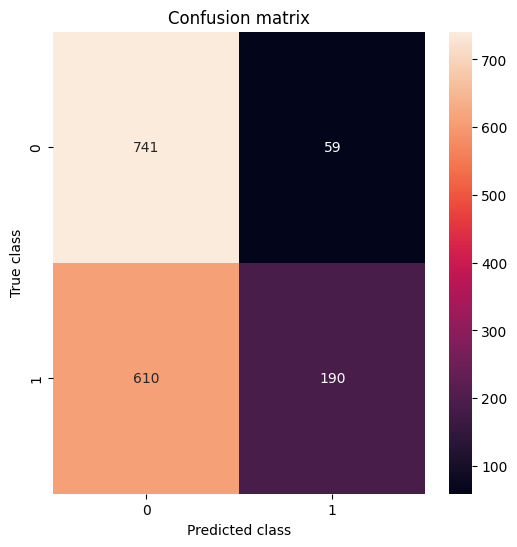

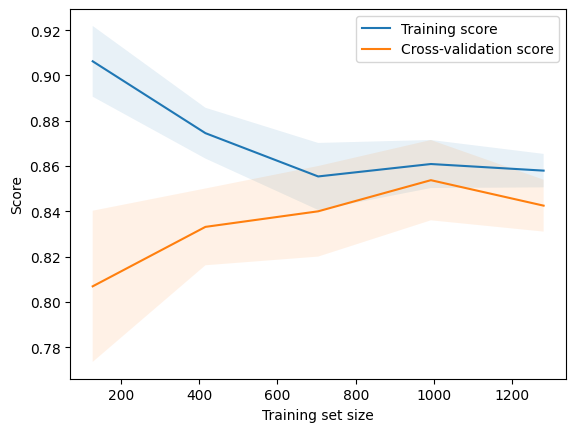

In [99]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_res, y_train_res) #train classifier

evaluate(lr, X_test, y_test)

bbc3 = BalancedBaggingClassifier(estimator=lr,
                                sampling_strategy='auto',
                                replacement=False,
                                
                                random_state=0)
 
#Train the classifier.
model_his=bbc3.fit(X_train_res, y_train_res)
evaluate(lr,X_test,y_test)
print_graphics(bbc3)

In [100]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
def train_with_cv(clf,X_train,y_train, cv=StratifiedKFold):
    sgk = cv(n_splits=5, shuffle=True, random_state=40)

    fold = 0
    aucs = []
    accs=[]
    recs=[]
    pca=PCA(int(df_normalized.shape[1]/2))
    pca.fit_transform(X_train,y_train)
    GROUPS = "edad"
    groups = pd.cut(df_normalized[GROUPS], bins=5, labels=False)
    for train_idx, val_idx in sgk.split(X_test, y_test, groups):
        # X_train = X_train.loc[train_idx]
        # y_train = y_train.loc[train_idx]

        X_val = X_test.loc[val_idx]
        y_val = y_test.loc[val_idx]

        # Fit Model on Train
        auc_score=None
        acc_score=None
        rec_score=None
        clf.fit(X_train, y_train)
        pred = clf.predict_proba(X_val)[:,1]
        y_pred=clf.predict(X_val)
        try:
            auc_score = roc_auc_score(y_val, pred)
            acc_score = accuracy_score(y_val,y_pred)
            rec_score=recall_score(y_val,y_pred)
        except ValueError:
            pass
        if auc_score is not None:
            print(f"======= Fold {fold} ========")
            print(
                f"El AUC en el conjunto de validación es {auc_score:0.4f}"
            )
        if acc_score is not None:
            print(
            f"El Accuracy en el conjunto de validación es {acc_score:0.4f}"
        )
        if rec_score is not None:
            print(
            f"El Recall en el conjunto de validación es {rec_score:0.4f}"
        )    
        fold += 1
        aucs.append(auc_score)
        accs.append(acc_score)
        recs.append(rec_score)
    oof_auc = np.mean(aucs)
    oof_acc=np.mean(accs)
    oof_rec=np.mean(recs)
    print(f'El resultado AUC promediado es {oof_auc:0.4f}')
    print(f'El resultado ACCURACY promediado es {oof_acc:0.4f}')
    print(f'El resultado RECALL promediado es {oof_rec:0.4f}')

======= Fold 0 ========
El AUC en el conjunto de validación es 0.6679
El Accuracy en el conjunto de validación es 0.5594
El Recall en el conjunto de validación es 0.2222
======= Fold 1 ========
El AUC en el conjunto de validación es 0.7203
El Accuracy en el conjunto de validación es 0.6156
El Recall en el conjunto de validación es 0.2895
======= Fold 2 ========
El AUC en el conjunto de validación es 0.7356
El Accuracy en el conjunto de validación es 0.6125
El Recall en el conjunto de validación es 0.2449
======= Fold 3 ========
El AUC en el conjunto de validación es 0.7025
El Accuracy en el conjunto de validación es 0.5437
El Recall en el conjunto de validación es 0.2024
======= Fold 4 ========
El AUC en el conjunto de validación es 0.6942
El Accuracy en el conjunto de validación es 0.5687
El Recall en el conjunto de validación es 0.2281
El resultado AUC promediado es 0.7041
El resultado ACCURACY promediado es 0.5800
El resultado RECALL promediado es 0.2374


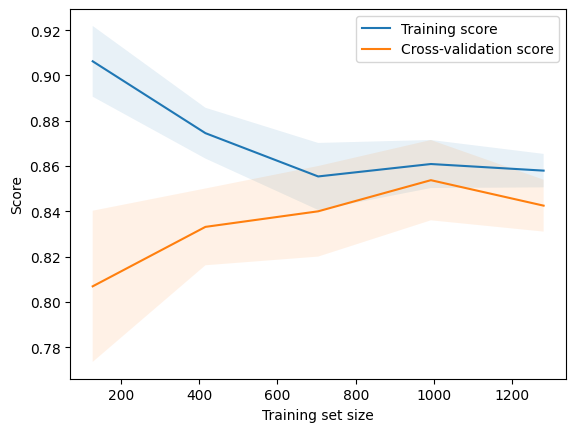

In [101]:
train_with_cv(bbc3,X_train_res,y_train_res)
print_graphics(bbc3)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 28)                812       
                                                                 
 dropout_50 (Dropout)        (None, 28)                0         
                                                                 
 dense_105 (Dense)           (None, 16)                464       
                                                                 
 dropout_51 (Dropout)        (None, 16)                0         
                                                                 
 dense_106 (Dense)           (None, 6)                 102       
                                                                 
 dense_107 (Dense)           (None, 1)                 7         
                                                                 
Total params: 1385 (5.41 KB)
Trainable params: 1385 (

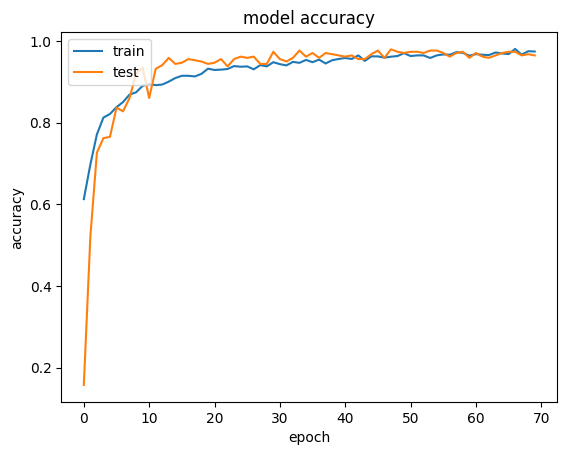

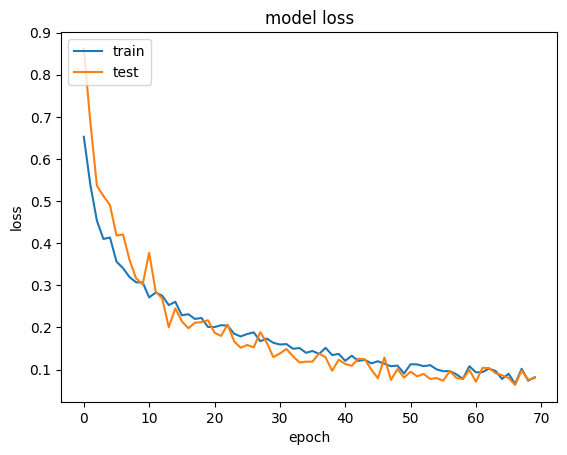

In [123]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
# ss=StandardScaler()
from imblearn.combine import SMOTETomek
# us = NearMiss(n_neighbors=10, version=2)
# X_train_res, y_train_res = us.fit_resample(X_train, y_train)
# os =  RandomOverSampler()
# X_train_res, y_train_res = os.fit_resample(X_train, y_train)

os_us =  SMOTETomek()
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=8) # 80% training and 20% test
X_train_res, y_train_res = os_us.fit_resample(X_train_res, y_train_res)
# Leer el archivo de Ejecución
df2 = pd.read_excel('../Mortalidad FINAL.xlsx',sheet_name='Ejecucion')
df2=df[['edad','peso','frecuencia_cardiaca','presion_arterial_sistolica','presion_arterial_diastolica','hb','creatinina','ckmb','trigliceridos','glicemia','colesterol','escala_grace','tiempo_isquemia','estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel','dialisis','scacest','insuficiencia_cardiaca_congestiva','enfermedad_arterias_coronarias','infarto_miocardio_agudo']]



X_test=df2.drop('estado_vital', axis=1)
y_test = df2['estado_vital']


from tensorflow import convert_to_tensor as ct
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Dense,Dropout

#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=28,activation="relu",input_dim=28))

model.add(Dropout(0.3))

#2nd hidden layer
model.add(Dense(units=16,activation="relu",))

model.add(Dropout(0.5))

#3rd hidden layer
model.add(Dense(units=6,activation="relu",))

#output layer
model.add(Dense(units=1,activation="sigmoid"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_his=model.fit(X_train_res,y_train_res,validation_split=0.21, batch_size=5,epochs=70,verbose=1)


y_pred=model.predict(X_test)
y_pred = (y_pred > 0.45)
print(classification_report(y_test,y_pred,zero_division=0))

ploting(model_his)